<a href="https://colab.research.google.com/github/Reis25/Bottles/blob/master/Projeto_id_garrafas_industria_am.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
 
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import pandas as pd
import tensorflow as tf
 
 
from PIL import Image
 
from sklearn.model_selection import train_test_split
 
import matplotlib.pyplot as plt
 
plt.style.use('ggplot')
 
    
# load and display an image with Matplotlib
#from matplotlib import image
 
batch_size = 8
num_classes = 8
epochs = 100
 
# input image dimensions
img_rows, img_cols = 120, 100
 
import os
 
path = './bottles/'
 
files = []
# r=root, d=directories, f = files
for r, d, f in os.walk(path):
    for file in f:
        if '.jpg' in file:
            files.append(file)
 
X = []
 
db = pd.read_csv(path +'bottles_ground_truth.csv', sep = ';', header = None, skiprows = 1)
db = db.fillna(0).to_numpy()

In [ ]:
for e in db[:, 0]:
    X.append(np.array(Image.open(path+e).resize((img_cols, img_rows), Image.ANTIALIAS)) )
y = db[:, 1:]
 
X = np.array(X)/255
y = np.array(y)
 
#x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [ ]:
y.shape

(141, 8)

In [ ]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)
 
datagen.fit(X)
 
'''
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
'''

"\nx_train = x_train.astype('float32')\nx_test = x_test.astype('float32')\nx_train /= 255\nx_test /= 255\nprint('x_train shape:', x_train.shape)\nprint(x_train.shape[0], 'train samples')\nprint(x_test.shape[0], 'test samples')\n"

In [ ]:


 
def build_model():
    model = Sequential()
    model.add(Conv2D(128, kernel_size=(3, 3),
                    activation='relu',
                    input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    return model

In [ ]:
flow = datagen.flow(X, y, batch_size=36)
y = y.astype('int8')
#X = X.astype('int8')

In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10)

# histograma de ambas as listas. 
history =[]
score =[]

for train_index, test_index in kf.split(X):
     #print("TRAIN:", train_index, "TEST:", test_index)
     X_train, X_test = X[train_index], X[test_index]
     y_train, y_test = y[train_index], y[test_index]

     # convert class vectors to binary class matrices
     #y_train = keras.utils.to_categorical(y_train, num_classes)
     #y_test = keras.utils.to_categorical(y_test, num_classes)
     # the data, split between train and test sets
     #the data, split between train and test sets
 
     if K.image_data_format() == 'channels_first':
          X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
          X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
          input_shape = (3, img_rows, img_cols)
     else:
          X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 3)
          X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 3)
          input_shape = (img_rows, img_cols, 3)
 
     model = build_model()
     model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
     
     history.append(model.fit(datagen.flow(X_train, y_train, batch_size=200), epochs=epochs))
     score.append(model.evaluate(X_test, y_test, verbose=0))

     print('Test loss:', score[-1][0])
     print('Test accuracy:', score[-1][1])

     




Epoch 1/100
1/1 [==============================] - 0s 8ms/step - loss: 1.8519 - accuracy: 0.0794
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 1.8638 - accuracy: 0.0635
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 1.8332 - accuracy: 0.0397
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 1.8292 - accuracy: 0.0635
Epoch 5/100
1/1 [==============================] - 0s 1ms/step - loss: 1.8289 - accuracy: 0.0556
Epoch 6/100
1/1 [==============================] - 0s 1ms/step - loss: 1.8348 - accuracy: 0.0317
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 1.8360 - accuracy: 0.0794
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 1.8268 - accuracy: 0.0556
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 1.8345 - accuracy: 0.0317
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 1.8394 - accuracy: 0.0317
Epoch 11/100
1/1 [===========

In [ ]:
y_train.shape

(71, 8)

In [ ]:
y_test.shape

(70, 8)

Test loss: [2.031264066696167, 0.8666666746139526]
Test accuracy: [1.3213565349578857, 0.7142857313156128]


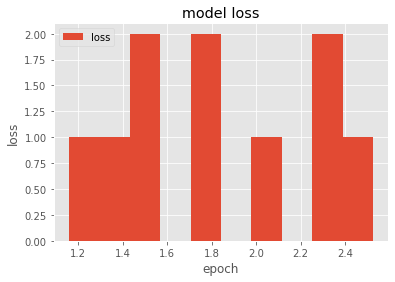

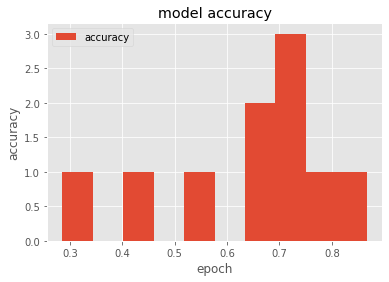

Media conjunto de teste 1.8175783514976502
Media conjunto de treinamento 1.8175783514976502
desvio padrao conjunto de teste 0.16247867229529356
desvio padrao conjunto de treinamento: 0.16247867229529356


In [ ]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

'''
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'], loc='upper left')
plt.show()
 
# summarize history for loss
 
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper left')
plt.show()
'''

model.save("model.h5")

plt.hist([score[e][0] for e in range(10)])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper left')
plt.show()

# acuracia: 
plt.hist([score[e][1] for e in range(10)])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'], loc='upper left')
plt.show()

import numpy as np

# acuracia do treino 
#print(np.mean([history[e].history['accuracy'] for e in range(10)]))

# conjunto de teste
print('Media conjunto de teste',np.mean([score[e][0] for e in range(10)]))
print('Media conjunto de treinamento',np.mean([score[e][0] for e in range(10)]))

print('desvio padrao conjunto de teste',np.std([score[e][1] for e in range(10)]))
print('desvio padrao conjunto de treinamento:',np.std([score[e][1] for e in range(10)]))




In [ ]:
from keras.models import load_model
import cv2
import numpy as np


class_names = ['a', 'b', 'c', ...] # fill the rest

model = load_model('model.h5')

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

img = cv2.imread('test.jpg')
img = cv2.resize(img,(320,240))
img = np.reshape(img,[1,320,240,3])

classes = np.argmax(model.predict(img), axis = -1)

print(classes)

names = [class_names[i] for i in classes]

print(names)